In [1]:
#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")
data

FileNotFoundError: ignored

In [54]:
#split into features/target
x = data.drop(columns = ['quality'])
#attemptd normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']

#split into training and test sets
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
   x, y, test_size=0.33, random_state=42)

In [55]:
#fit a linear regression model on training data
reg = sklearn.linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [56]:
#display coefficients
reg.coef_

array([ 1.91482708e-02, -1.04879349e+00, -2.05059436e-01,  1.84280865e-02,
       -1.71727378e+00,  3.14508676e-03, -3.00515039e-03, -2.07241572e+01,
       -3.26748948e-01,  7.89183448e-01,  2.88943124e-01])

In [57]:
#predict test values based on fitted model
y_pred_reg = reg.predict(x_test)

In [58]:
#display MSE and R^2 value
print("Mean squared error: %.2f" % sklearn.metrics.mean_squared_error(y_test, y_pred_reg))
print("Coefficient of determination: %.2f" % sklearn.metrics.r2_score(y_test, y_pred_reg))

Mean squared error: 0.42
Coefficient of determination: 0.36


In [59]:
x_test = pd.DataFrame(x_test)

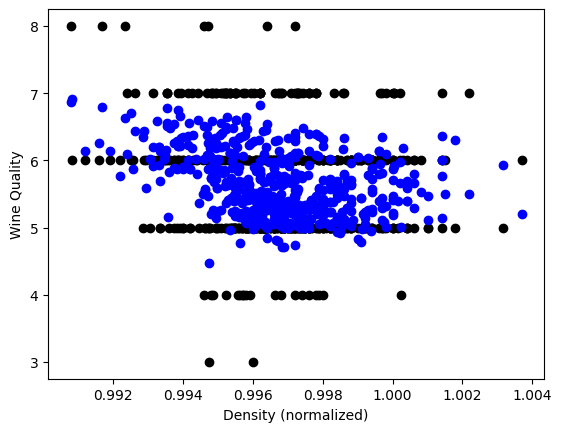

In [62]:
#use one feature (Density) and plot versus predicted/real quality for visualization purposes
x_feat = x_test["density"]
plt.scatter(x_feat, y_test, color="black")
plt.scatter(x_feat, y_pred_reg, color="blue")

plt.xticks()
plt.ylabel("Wine Quality")
plt.yticks()
plt.xlabel("Density (normalized)")

plt.show()

In [63]:
#fit a ridge classifier to training data
cls = linear_model.RidgeClassifier()
cls.fit(x_train, y_train)

#predict classes for test data
y_pred_cls = cls.predict(x_test)

#display accuracy
print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred_cls))

Accuracy: 0.56


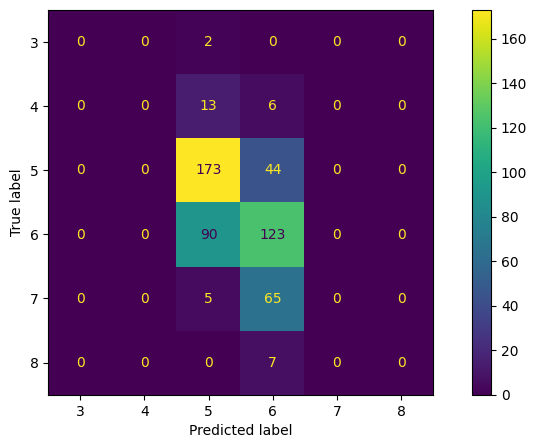

In [64]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cls, ax=ax)